In [1]:
import pandas as pd
import numpy as np
from src.data_display import display_hubble_MW,display_velocities_distance,animated_velocities_distance,display_mean_squared_velocity_consistent
from src.data_treatment_tools import new_CoM_procedure, add_radian_columns
from IPython.display import clear_output

ModuleNotFoundError: No module named 'pandas'

In [ ]:
file_path = 'data/new_data.csv'
galaxy_df = pd.read_csv(file_path)
add_radian_columns(galaxy_df)

In [3]:
galaxy1="NGC5128_CenA"
galaxy2="NGC5236_M83"
r=0.76
CoM_Name="CoM_CenA_M83_0.76"
new_CoM_procedure(galaxy_df,galaxy1,galaxy2,r,row_name=CoM_Name,grid_incertainty=True)
print(galaxy_df.columns)
galaxy_df.to_csv("data/data_"+CoM_Name+".csv")

CoM_CenA_M83_0.76
Index(['Name', 'PGC', 'RA', 'Dec', 'Dis', 'e_Dis_min', 'e_Dis_max', 'ref_dis',
       'V_h', 'e_V_h', 'ref_V_h', 'Source', 'Type', 'RA_radians',
       'Dec_radians', 'cos_theta_CoM_CenA_M83_0.76',
       'angular_distance_CoM_CenA_M83_0.76', 'dis_center_CoM_CenA_M83_0.76',
       'e_dis_center_min_CoM_CenA_M83_0.76',
       'e_dis_center_max_CoM_CenA_M83_0.76',
       'major_infall_velocity_CoM_CenA_M83_0.76',
       'e_major_infall_velocity_min_CoM_CenA_M83_0.76',
       'e_major_infall_velocity_max_CoM_CenA_M83_0.76',
       'minor_infall_velocity_CoM_CenA_M83_0.76',
       'e_minor_infall_velocity_min_CoM_CenA_M83_0.76',
       'e_minor_infall_velocity_max_CoM_CenA_M83_0.76'],
      dtype='object')


In [14]:
file_path = 'data/data_'+CoM_Name+'_lg.csv'
galaxy_df = pd.read_csv(file_path)

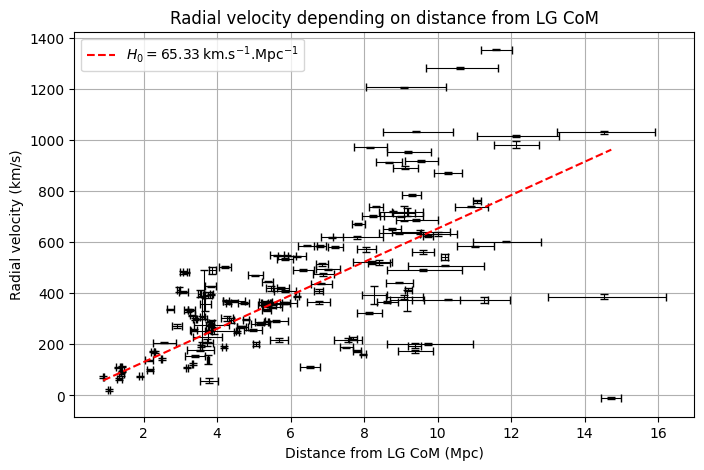

In [15]:
display_hubble_MW(galaxy_df)

e_dis_center_min_CoM_CenA_M83_0.76 e_dis_center_max_CoM_CenA_M83_0.76 e_minor_infall_velocity_min_CoM_CenA_M83_0.76 e_minor_infall_velocity_max_CoM_CenA_M83_0.76
e_dis_center_min_CoM_CenA_M83_0.76 e_dis_center_max_CoM_CenA_M83_0.76 e_major_infall_velocity_min_CoM_CenA_M83_0.76 e_major_infall_velocity_max_CoM_CenA_M83_0.76


c:\Users\Adrian\Documents\X\Stage 3A recherche\projet\project_3A\cleaned_project\src\data_display.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


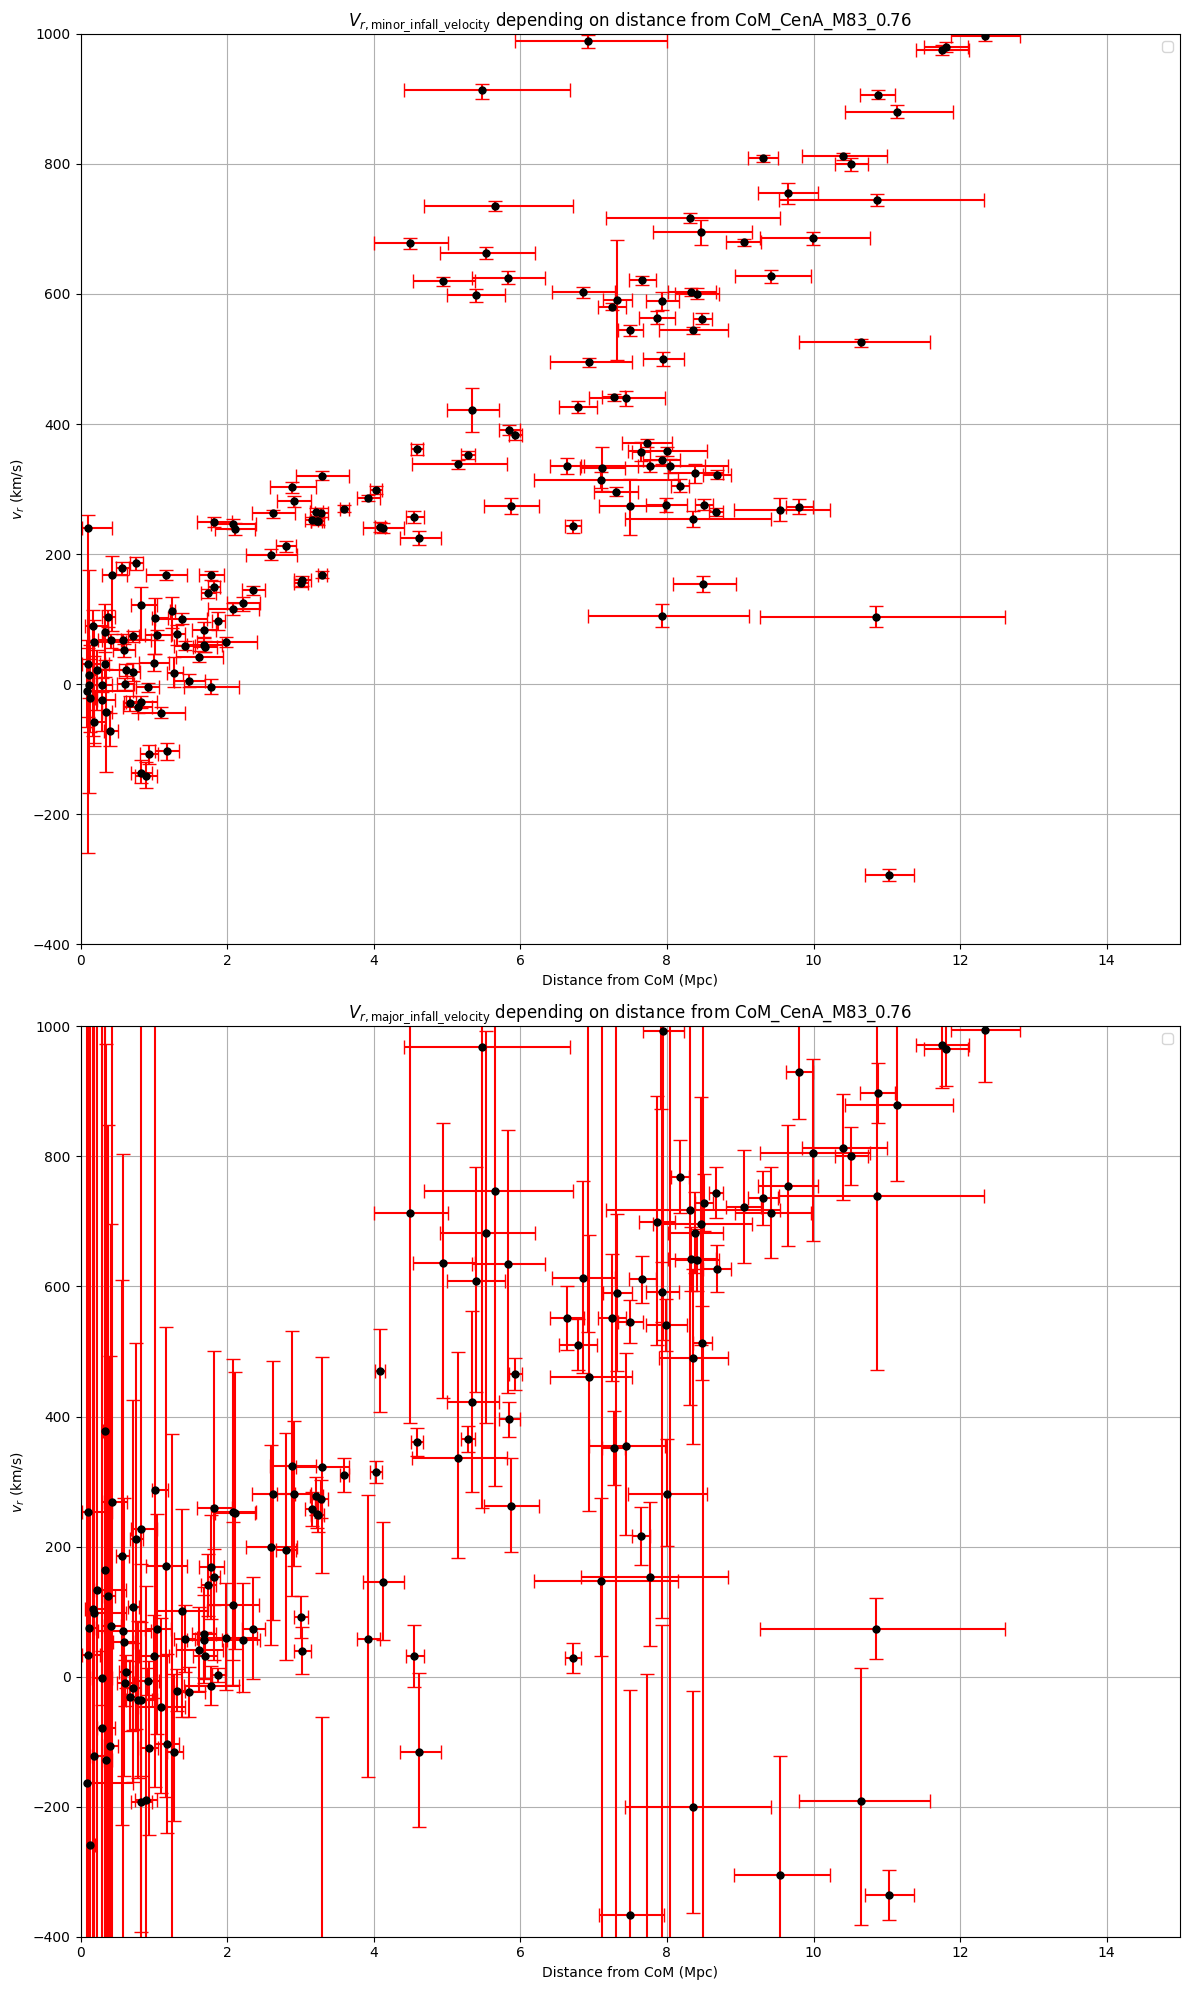

In [16]:
velocities=["minor_infall_velocity","major_infall_velocity"]
display_velocities_distance(galaxy_df,velocities=velocities,row_name=CoM_Name)

In [18]:
r_values=mass_ratios = np.linspace(0, 1, 50)
for r in r_values:
    clear_output(wait=True)
    new_CoM_procedure(galaxy_df,galaxy1=galaxy1,galaxy2=galaxy2,m1_barre=r)
galaxy_df.to_csv("all_mass_ratio.csv")

c:\Users\Adrian\Documents\X\Stage 3A recherche\projet\project_3A\cleaned_project\src\data_treatment_tools.py:106: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["cos_theta_"+galaxy_center]= cos_theta
c:\Users\Adrian\Documents\X\Stage 3A recherche\projet\project_3A\cleaned_project\src\data_treatment_tools.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['angular_distance_'+galaxy_center] = np.arccos(cos_theta)
c:\Users\Adrian\Documents\X\Stage 3A recherche\projet\project_3A\cleaned_project\src\data_treatment_tools.py:12

CoM_NGC5128_CenA_NGC5236_M83_1.0


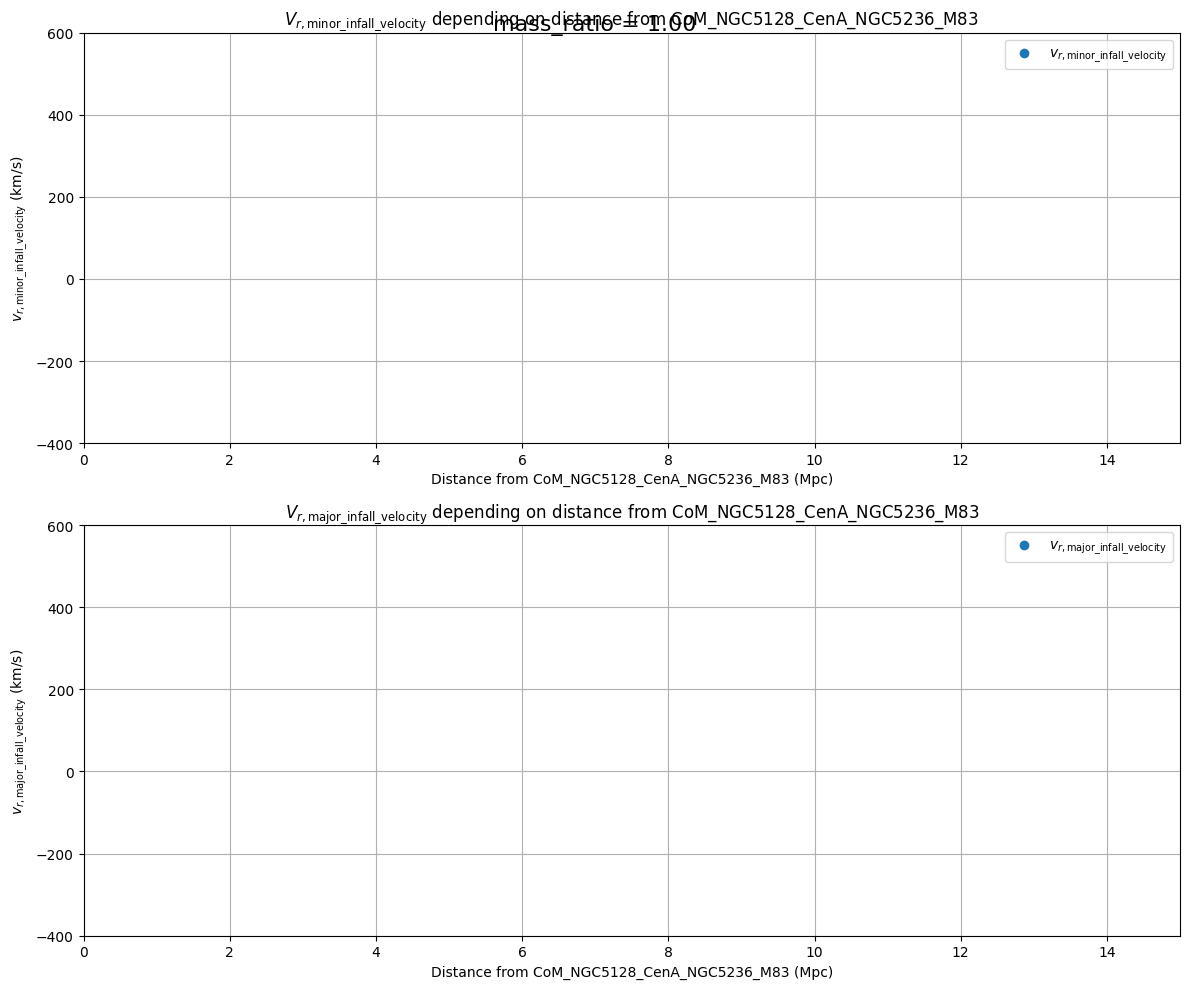

In [19]:
velocities=["minor_infall_velocity","major_infall_velocity"]
animated_velocities_distance(galaxy_df,velocities=velocities,mass_ratios=r_values,partial_row_name="CoM_NGC5128_CenA_NGC5236_M83")

Nombre de galaxies exclues pour minor_infall_velocity: 108
Nombre de galaxies exclues pour major_infall_velocity: 124


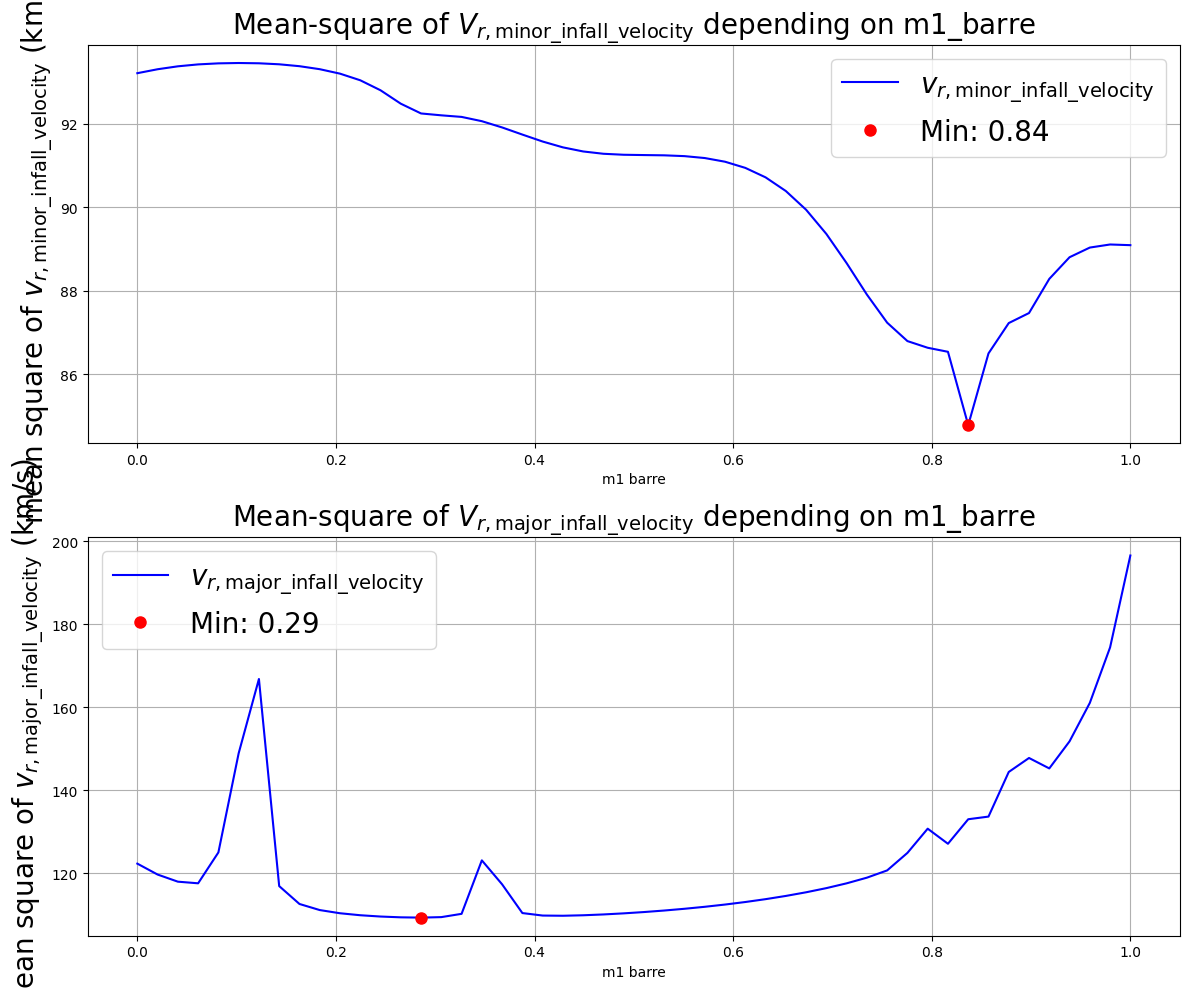


Résumé des valeurs minimales pour chaque vitesse:
Vitesse minor_infall_velocity: Ratio de masse optimal = 0.8367, Valeur minimale = 84.79 km/s
Vitesse major_infall_velocity: Ratio de masse optimal = 0.2857, Valeur minimale = 109.27 km/s


{'minor_infall_velocity': {'mass_ratio': np.float64(0.836734693877551),
  'mean_square_value': np.float64(84.78601298488559)},
 'major_infall_velocity': {'mass_ratio': np.float64(0.2857142857142857),
  'mean_square_value': np.float64(109.26858993094945)}}

In [24]:
velocities=["minor_infall_velocity","major_infall_velocity"]
display_mean_squared_velocity_consistent(galaxy_df,velocities=velocities,mass_ratios=r_values,partial_row_name="CoM_NGC5128_CenA_NGC5236_M83",lower_bound=-1000,upper_bound=1000,max_dix=2,combined_plot=False)